## Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [81]:
data = pd.read_csv('datasets/linear-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## Data splitting and preparation

In [98]:
X = data['X'] 
y = data['y'] 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

## Visualization of Train / Test Split

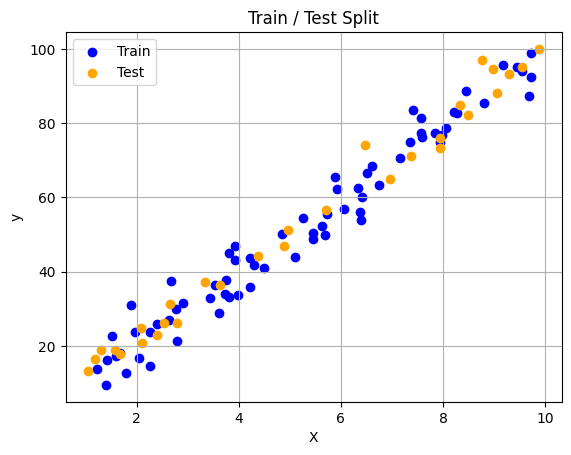

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='orange', label='Test')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Train / Test Split")
plt.legend()
plt.grid(True)
plt.show()

## Function definitions to run Gradient Descent

In [106]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        y_pred = X[i] * w  + b
        error = (y_pred - y[i])**2
        cost += error
    cost = (1 / (2 * m)) * cost 
    return cost


def compute_gradient(X, y, w, b):
    m = len(X)

    dj_dw = 0
    dj_db = 0 

    for i in range(m):
        y_pred = X[i] * w + b
        error = y_pred - y[i]

        dj_dw += error * X[i] 
        dj_db += error    

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


def gradient_descent(X, y, w, b, alpha, epochs):
    cost_history = []
    params_history = []  
    for i in range (epochs):
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db      

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w, b))

    return w, b, cost_history, params_history


def predict(X, w, b):
    return w * X + b


def plot_all_regression_lines(X, y, params_history, cost_history):
    plt.scatter(X, y, label='Data', color='orange')

    for i in range(0, len(params_history)):
        w, b = params_history[i]
        y_pred = predict(X, w, b)
        plt.plot(X, y_pred, alpha=0.4, label=f'Epoch {i}')

    w, b = params_history[-1]
    plt.plot(X, y_pred, color='red', linewidth=2, label='Final Line')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Regression Line Evolution')
    plt.legend(fontsize='small')
    plt.show()

    print("Cost at each epoch:")
    for epoch, cost in enumerate(cost_history):
        print(f"Epoch {epoch}: {cost:.2f}")

## Calculating Initial Cost

In [89]:
w = 0
b = 0
cost = compute_cost(X_train, y_train, w, b)
print("Initial cost:", cost)

Initial cost: 1647.2899032268833


## Running Gradient Descent

In [90]:
alpha = 0.01
epochs = 10
w_final, b_final, cost_history, params_history = gradient_descent(X_train, y_train, w, b, alpha, epochs)

## Output prediction

In [ ]:


y_train_pred = predict(X_train, w_final, b_final)
y_test_pred = predict(X_test, w_final, b_final)

## Visualization of Linear Regression 

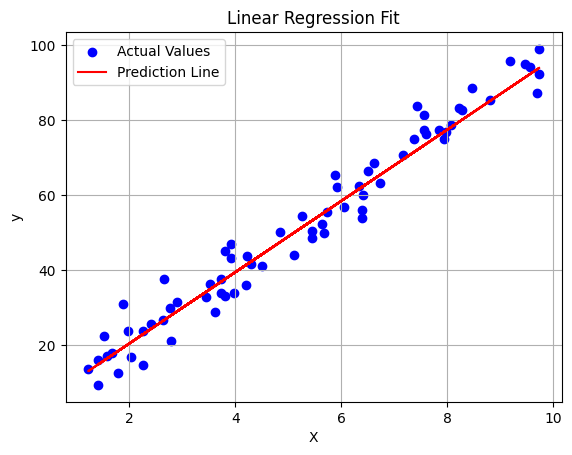

In [ ]:
plt.scatter(X_train, y_train, color='blue', label="Actual Values")
plt.plot(X_train, y_train_pred, color='red', label="Prediction Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

## Visualization of Evolution of Linear Regression on test data

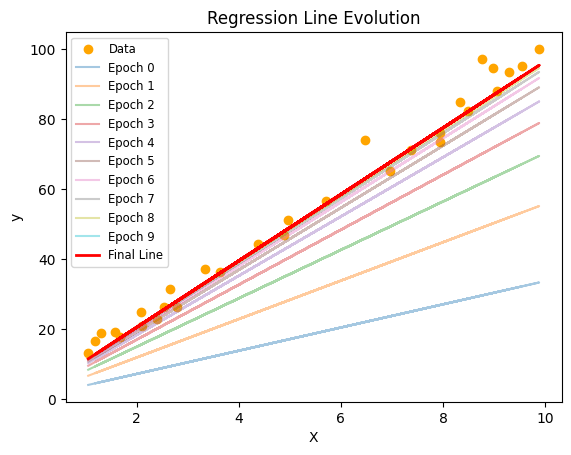

Cost at each epoch:
Epoch 0: 715.58
Epoch 1: 314.47
Epoch 2: 141.79
Epoch 3: 67.44
Epoch 4: 35.44
Epoch 5: 21.66
Epoch 6: 15.73
Epoch 7: 13.17
Epoch 8: 12.07
Epoch 9: 11.60


In [107]:
plot_all_regression_lines(X_test, y_test, params_history, cost_history)

## Model Evaluation

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 3.0385803987027904
MSE: 17.863585704324084
R2 Score: 0.9793978657116285
